<a href="https://colab.research.google.com/github/rpizarrog/innovacion-empresarial/blob/main/notebook_python/Caso_02_Regresi%C3%B3n_Polinomial_con_datos_de_estaturas.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# Objetivo

Construir e interpretar un modelo de regresión polinomial de segundo nivel, tercer nivel y quinto nivel.




# Descripción

* Cargar librerías.
* Crear funciones.
* Cargar datos.
* Crear modelo de regresión polinomial a la segunda potencia.
* Identificar métricas *r square* con valor por encima del  50 % para aceptar el modelo y de RMSE cercano a 0 que deberá ser comparado con otro modelo de regresión.
* Partir en datos de entrenamiento y datos de validación con el  70 % y  30 %.
* Evaluar modelo con datos de entrenamiento con el valor *r square*.
* Visualizar curva de regresión con el modelo construído y los datos de entrenamiento.
* Realizar predicciones utilizando el modelo con los datos de validación.
* Evaluar el modelo con el estadístico *RMSE root mean square error*
* Interpretar el caso.



# Desarrollo



## Cargar librerías


In [1]:
import pandas as pd
import numpy as np
from sklearn import linear_model
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import PolynomialFeatures # Polinomial


import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn import metrics
from sklearn.metrics import mean_squared_error, r2_score
#%matplotlib inline

## Crear funciones



In [2]:
# Función que devuelve las medias aritméticas y desviaciones estándar de dos variables numéricas de una muestra
def f_medias (independiente, dependiente):
  medias = [np.mean(independiente), np.mean(dependiente)]
  return medias

def f_dispersion (x, y, x_nombre, y_nombre):
  medias = f_medias(x, y)

   # Crear el diagrama de dispersión
  plt.scatter(x, y, s = 5)

  # Etiquetas y título
  plt.xlabel(x_nombre)
  plt.ylabel(y_nombre)
  plt.title('Diagrama de Dispersión')
  plt.axvline(x=medias[0], color='blue', linestyle='--', linewidth=0.5,
            label="Media "+ x_nombre + ":" + str(np.round(medias[0], 2)))
  plt.axhline(y=medias[1], color='green', linestyle='--', linewidth=0.5,
            label="Media "+ y_nombre+":" + str(np.round(medias[1], 2)))
  plt.legend()
  # Mostrar el diagrama de dispersión
  plt.show()

# Función que devuelve la covariana y correlación de Pearson y r square de dos variables numéricas de una muestra
def f_cov_corr(independiente, dependiente):
  covar = np.cov(independiente, dependiente, ddof=1)[0,1]
  r = np.corrcoef(independiente, dependiente)[0,1]
  r_square = r ** 2
  return covar, r, r_square

# Función que visualiza la dispersión de los datos y la curva de tendencia

def f_regresion_curva_tendencia(modelo, x, y, xlabel, ylabel, grado):
  # Obtener el término de intercepción
  intercepto = modelo.intercept_
  print(f"Intercepto (β0): {intercepto}")

  # Obtener los coeficientes
  coeficientes = modelo.coef_
  print(f"Coeficientes (β1, β2, ...): {coeficientes}")
  # Crear un rango de valores en X para la predicción de la curva de tendencia
  x_range = np.linspace(x.min(), x.max(), 100).reshape(-1, 1)

  # Transformar los valores de X_range a características polinomiales
  poly_transformer = PolynomialFeatures(degree=grado)  # Asume que el modelo es de segundo grado
  x_range_poly = poly_transformer.fit_transform(x_range)

  # Predecir los valores de y para X_range usando el modelo
  predicciones = modelo.predict(x_range_poly)

  # Graficar los datos de entrenamiento
  plt.scatter(x, y, color='blue', s=5, label='Datos de entrenamiento')

  # Graficar la curva de tendencia
  plt.plot(x_range, predicciones, color='red', label='Curva de tendencia')

  # Añadir etiquetas y leyenda
  plt.xlabel(xlabel)
  plt.ylabel(ylabel)
  plt.title('Regresión Polinomial')
  plt.legend()

  # Mostrar el gráfico
  plt.show()

## Cargar los datos


In [3]:
datos = datos = pd.read_csv("https://raw.githubusercontent.com/rpizarrog/innovacion-empresarial/main/datos/estaturas_pesos.csv", encoding='latin1')
print(datos)

    estaturas  pesos
0         178     79
1         172     75
2         160     62
3         192    107
4         167     72
..        ...    ...
57        170     75
58        180     85
59        180     95
60        170     75
61        172     78

[62 rows x 2 columns]


## Dispersión de los datos



[178 172 160 192 167 170 185 175 180 170 180 180 170 183 161 150 162 177
 190 165 164 183 175 168 170 175 175 178 170 160 162 166 178 170 163 165
 170 167 159 165 181 170 172 171 178 165 162 187 189 174 160 190 155 180
 175 170 165 170 180 180 170 172]
[ 79  75  62 107  72  52  90  70  85  92  87  82  75  90  65  56  56  82
  95  70  80  92  74  65  77  72  65  70  75  65  60  67  75  70  60  72
  76  78  60  68  76  60  75  78  76  64  62  87  90  72  54  90  80  80
  75  68  80  75  85  95  75  78]


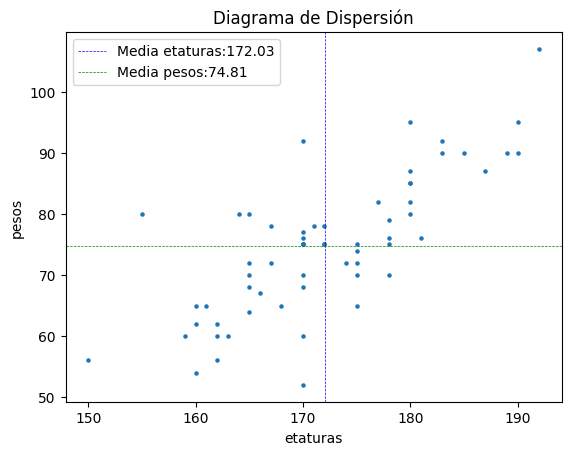

In [4]:
estaturas = datos['estaturas'].to_numpy()
pesos = datos['pesos'].to_numpy()

print (estaturas)
print(pesos)

f_dispersion(datos['estaturas'], datos['pesos'], "etaturas", "pesos")

## Crear datos de entrenamiento y validación

* Los datos de entrenamiento serán aleatoriamente el 70% de los datos originales.
* Los datos de validación o prueba (test) serán aleatoriamente el complemento del 30%.
* Los datos de entrenamiento y datos de validación deben
set mutuamente excluyentes que signifia que están en uno conjunto o están en el otro.

Ahora que se tiene la variable independiente estaturas y la variable dependiente pesos, el siguiente paso es dividir estos datos en conjuntos de entrenamiento y prueba o validación.

Se utiiza el método *train_test_split()* que forma parte de la librería Scikit-Learn para dividir los datos en entrenamiento y validación.

El argumento *test_size* establece el 30% para datos de validación por lo que el $70$% pertenece a los datos de entrenamiento y el resto a datos de validación o prueba.

In [5]:
estaturas_train, estaturas_test, pesos_train, pesos_test = train_test_split(estaturas, pesos, test_size=0.2,
                                                                            random_state=2025)

# Crear un DataFrame con los datos de entrenamiento
print ("Datos de entrenamiento")
datos_entrenamiento = pd.DataFrame({'estaturas': estaturas_train, 'pesos': pesos_train})

# Datos de entrenamiento
print(datos_entrenamiento)

# Crear un DataFrame con los datos de validación o test
datos_validacion = pd.DataFrame({'estaturas': estaturas_test, 'pesos': pesos_test})


# Datos de validación
print ("Datos de Validación")
print(datos_validacion)


Datos de entrenamiento
    estaturas  pesos
0         180     85
1         159     60
2         174     72
3         178     76
4         171     78
5         166     67
6         165     64
7         170     52
8         183     92
9         150     56
10        170     77
11        189     90
12        167     72
13        160     54
14        180     80
15        175     65
16        170     68
17        183     90
18        178     70
19        170     92
20        170     75
21        170     60
22        180     82
23        172     75
24        177     82
25        175     72
26        170     76
27        170     75
28        178     79
29        162     56
30        164     80
31        162     62
32        168     65
33        190     90
34        181     76
35        170     70
36        161     65
37        180     87
38        167     78
39        175     74
40        178     75
41        180     85
42        165     70
43        192    107
44        165     80
45        1

## r square con los datos de entrenamiento

In [6]:
cova, r, r_square =  f_cov_corr(estaturas_train, pesos_train)
print ("Con los datos de entrenamiento; r square = ", r_square)

Con los datos de entrenamiento; r square =  0.6206686345839267


## Métricas de evaluación

El modelo se acepta si el valor de *r square* sobrepasa el  50 % tanto con los datos de entrenamiento como con los datos de validación.

El modelo a través de la métrica *root mean square error (RMSE)* que significa que tanto varía las predicciones con respecto a los datos reales se deberá comparar con otros modelos y los mismos datos para evalura su rendimiento.

## Construir el modelo polinomial de segundo nivel

### Preprocesamiento de los datos

Convertir las características de entrada en características polinomiales de segundo grado.


In [7]:
# Preprocesamiento - Transformar las características de entrada
grado = 2  # Aquí modifiar el grado a tercer nivel o a quinto nivel
poly = PolynomialFeatures(degree=grado)
estaturas_train_poly = poly.fit_transform(estaturas_train.reshape(-1, 1))
estaturas_test_poly = poly.transform(estaturas_test.reshape(-1, 1))

### Construir y entrenar el modelo de regresión lineal

Utilizar las características polinomiales para entrenar el modelo.



In [8]:
# Construir y entrenar el modelo de regresión lineal
modelo_polinomial = LinearRegression()
modelo_polinomial.fit(estaturas_train_poly, pesos_train)

LinearRegression()

### Mostrar la curva de tendencia

Mandar llamar la función con el modelo creado


$$
predicciones = Y = \beta_0 + \beta_1\cdot x_i+\beta_2\cdot x_i^2 + … \beta_n \cdot x_i^n
$$

* $Y$ es la predicción.
* $β_0$ es el coeficiente de intersección de la abcisa.
* $β_1$ y $β_2$ son los coeficientes elevados a la primera y segunda potencia respectivamente.
* $x_i$ es el valor de $x_i$ es decir los valores de la variable independiente.



Intercepto (β0): 213.4783128008462
Coeficientes (β1, β2, ...): [ 0.         -2.63622128  0.01059294]


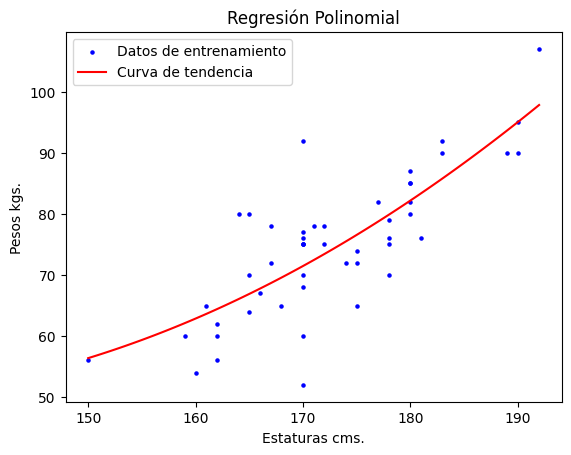

In [9]:
f_regresion_curva_tendencia(modelo_polinomial, estaturas_train.reshape(-1, 1),
                            pesos_train.reshape(-1, 1),
                             "Estaturas cms.", "Pesos kgs.", grado)



### Hacer predicciones

Usar el conjunto de validación para hacer predicciones y evaluar el rendimiento del modelo.

$$
\text{para x = 170 ¿Cual es la predicción aproximadamente?}
$$

$$
\text{predicción Y} =
223.01 + (−2.6361\times x_i) + (0.0102 \times x_i^{2}
 )\approx
$$

$$
\text{predicción Y} =
223.01 + (−2.6361\times 170) + (0.0102 \times 170^{2}
 )\approx 71.7039
$$


In [10]:
# 223.01+(−2.6361*170)+(0.0102*170**2)
223.01097115218664 +(-2.63613353*170) + (0.01027113 * 170**2)

71.7039280521866

In [11]:
# Predicciones
print ("Coeficiene intersección: ", modelo_polinomial.intercept_)
print ("Coeficientes de acuerdo a la potencia")
print (modelo_polinomial.coef_)

# Las predicciones
predicciones = modelo_polinomial.predict(estaturas_test_poly)
print(predicciones)



Coeficiene intersección:  213.4783128008462
Coeficientes de acuerdo a la potencia
[ 0.         -2.63622128  0.01059294]
[90.92931118 59.35930086 76.54825267 66.89448317 71.45654452 73.42967017
 66.89448317 65.21795973 62.86206862 62.86206862 82.16960762 88.32060937
 76.54825267]


## Comparaciones

Crear un data.frame llamado comparaciones a partir de la creación de un diccionario con los valores reales del conjunto de validacipon y las predicciones calculadas.

Con la función flatten().tolist() convierte el arreglo a una lista de una dimensión.

In [12]:
diccionario = {'Estatura': estaturas_test.flatten().tolist(),
                'Real' : pesos_test.flatten().tolist(),
               'Predicho' : predicciones.flatten().tolist() }
# diccionario

comparaciones = pd.DataFrame(diccionario)
print (comparaciones)

    Estatura  Real   Predicho
0        187    87  90.929311
1        155    80  59.359301
2        175    75  76.548253
3        165    68  66.894483
4        170    75  71.456545
5        172    75  73.429670
6        165    72  66.894483
7        163    60  65.217960
8        160    62  62.862069
9        160    65  62.862069
10       180    95  82.169608
11       185    90  88.320609
12       175    70  76.548253


## RMSE

¿Qué tanto se desvián las predicciones de los valores reales?

Error estándar médio MSE
$$
MSE = \frac{\sum(predicho_i - real_i)^{2}}{n}
$$

Raiz del error estándar medio

$$
RMSE = \sqrt{\frac{\sum(predicho_i - real_i)^{2}}{n}}
$$

In [13]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesos_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesos_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesos_test, predicciones)))

cova, r, r_square =  f_cov_corr(estaturas_test, pesos_test)
print ("Con los datos de validación; r square = ", r_square)



Mean Absolute Error: MAE 5.132236720809989
Mean Squared Error: MSE 56.08042052535306
Root Mean Squared Error RMSE: 7.488686168170827
Con los datos de validación; r square =  0.5115185155855867


## Construir el modelo polinomial de tercer nivel:


Intercepto (β0): -3056.206175419271
Coeficientes (β1, β2, ...): [ 0.00000000e+00  5.47115093e+01 -3.23820552e-01  6.48349398e-04]


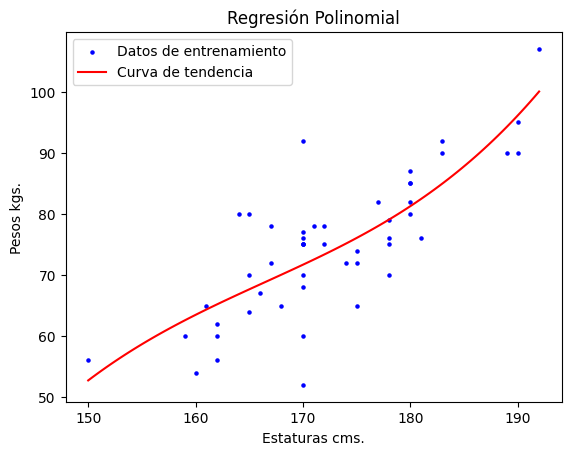

In [18]:
# Preprocesamiento - Transformar las características de entrada
grado = 3  # Aquí modifiar el grado a tercer nivel o a quinto nivel
poly = PolynomialFeatures(degree=grado)
estaturas_train_poly = poly.fit_transform(estaturas_train.reshape(-1, 1))
estaturas_test_poly = poly.transform(estaturas_test.reshape(-1, 1))

# Construir y entrenar el modelo de regresión lineal
modelo_polinomial = LinearRegression()
modelo_polinomial.fit(estaturas_train_poly, pesos_train)

f_regresion_curva_tendencia(modelo_polinomial, estaturas_train.reshape(-1, 1),
                            pesos_train.reshape(-1, 1),
                             "Estaturas cms.", "Pesos kgs.", grado)

### Predicciones  TERCER NIVEL


In [19]:
# Predicciones
print ("Coeficiene intersección: ", modelo_polinomial.intercept_)
print ("Coeficientes de acuerdo a la potencia")
print (modelo_polinomial.coef_)

# Las predicciones Y COMPARACIONES
predicciones = modelo_polinomial.predict(estaturas_test_poly)
print(predicciones)

diccionario = {'Estatura': estaturas_test.flatten().tolist(),
                'Real' : pesos_test.flatten().tolist(),
               'Predicho' : predicciones.flatten().tolist() }
# diccionario

comparaciones = pd.DataFrame(diccionario)
print (comparaciones)

Coeficiene intersección:  -3056.206175419271
Coeficientes de acuerdo a la potencia
[ 0.00000000e+00  5.47115093e+01 -3.23820552e-01  6.48349398e-04]
[90.85348859 58.66110351 76.05108346 67.64485353 71.67702748 73.35839336
 67.64485353 66.01878822 63.46829955 63.46829955 81.25328352 87.7698897
 76.05108346]
    Estatura  Real   Predicho
0        187    87  90.853489
1        155    80  58.661104
2        175    75  76.051083
3        165    68  67.644854
4        170    75  71.677027
5        172    75  73.358393
6        165    72  67.644854
7        163    60  66.018788
8        160    62  63.468300
9        160    65  63.468300
10       180    95  81.253284
11       185    90  87.769890
12       175    70  76.051083


### RMSE Tercer nivel


In [20]:
print('Mean Absolute Error: MAE', metrics.mean_absolute_error(pesos_test, predicciones))
print('Mean Squared Error: MSE', metrics.mean_squared_error(pesos_test, predicciones))
print('Root Mean Squared Error RMSE:', np.sqrt(metrics.mean_squared_error(pesos_test, predicciones)))

cova, r, r_square =  f_cov_corr(estaturas_test, pesos_test)
print ("Con los datos de validación; r square = ", r_square)

Mean Absolute Error: MAE 5.1511568539748485
Mean Squared Error: MSE 59.647857006926685
Root Mean Squared Error RMSE: 7.723202509770586
Con los datos de validación; r square =  0.5115185155855867


* Falta el cuerto nivel
* Falta el de quinto nivekl
* pendientes




# Interpretación

Se cargó un conjunto de datos con variables de interés estaturas y pesos corporales de personas.

Se construyó un modelo de regresión polinómica a segundo nivel con datos de entrenamiento. La variable estaturas fué la variable predictora o independiente y la variable peso fue la variable objetivo o dependiente.

A partir el modelo de regresión polinómica se extrajeron los coeficientes de la abcisa o intersección y los coeficientes.

Coeficiene intersección:  223.01097115218664
Coeficientes de acuerdo a la potencia
[ 0.         -2.63613353  0.01027113]

Estos valores significan los valores para la estimación de acuerdo al modelo.

Se visualizó la dispersión de los datos con los valores de entrenamiento y se estimó la curva de regresión presentada también visualmente.

Habiendo relizado una evaluación del modelo con datos de entrenamiento o datos que se utilizaron para construir el modelo con el estadístico *r quare* o coeficiente de determinación se encontró que el valor de estaturas representa aproximadamente un  51  % al valor del peso corporal de una persona.

Se utilizaron datos de prueba o datos de validación con las mismas variables de estaturas y pesos para construir predicciones.

Habiendo relizado una evaluación del modelo con los datos de validación o datos de prueba con el estadístico *r square* o coeficiente de determinación se encontró que el valor de estatura representa aproximadamente un 81 % al valor del peso corporal de una persona.

El modelo se acepta datos que el valor de *r square* como métrica establecida inicialmente sobrepasa el 50 % tanto con los datos de entrenamiento como con los datos de validación.

El valor de *RMSE root mean square error* o error cuadrático medio significa que tanto el modelo es eficiente y su valor cercano a cero representa esa eficiencia.

El valor del modelo polinomial egundo nivel fue de fue de  6.15  aproximadamente y debe ser comparado contra otro modelo para medir su eficiencia en relación con otros.

El valor del modelo polinomial egundo nivel fue de fue de  7.33 aproximadamente y debe ser comparado contra otro modelo para medir su eficiencia en relación con otros.


Comparado contra el modelo de regresión linel simple es mejor el modelo polinómico de segundo nivel ya que RMSE es menor

!Hasta la próxima!